In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import shutil

In [2]:
zip_path='/content/drive/MyDrive/crop_pest_and_desiase_classification.zip'
extract_path='/content/crop_pest_and_desiase_classification'
output_path = '/content/organized_dataset' #FOR THREE CLASSSES


In [3]:
with zipfile.ZipFile(zip_path,'r') as zip_ref:
  zip_ref.extractall(extract_path)

In [4]:
os.listdir(extract_path)

['Cassava healthy',
 'Maize leaf blight',
 'Cashew healthy',
 'Tomato leaf blight',
 'Cashew red rust',
 'Maize leaf beetle',
 'Maize grasshoper',
 'Tomato septoria leaf spot',
 'Maize fall armyworm',
 'Cashew anthracnose',
 'Maize streak virus',
 'Cassava mosaic',
 'Tomato healthy',
 'Cassava green mite',
 'Cassava bacterial blight',
 'Cashew leaf miner',
 'Maize leaf spot',
 'Tomato leaf curl',
 'Maize healthy',
 'Cashew gumosis',
 'Tomato verticulium wilt',
 'Cassava brown spot']

In [5]:
classes=[cls for cls in os.listdir(extract_path)]
print(f"total classess:{len(classes)}")

total classess:22


In [6]:
total_images=0
for cls in classes:
  images=os.listdir(os.path.join(extract_path,cls))
  total_images+=len(images)
print(f"total images:{total_images}")

total images:25220


Error reading image leaf beetle798_.jpg in class Maize leaf beetle: cannot identify image file '/content/crop_pest_and_desiase_classification/Maize leaf beetle/leaf beetle798_.jpg'


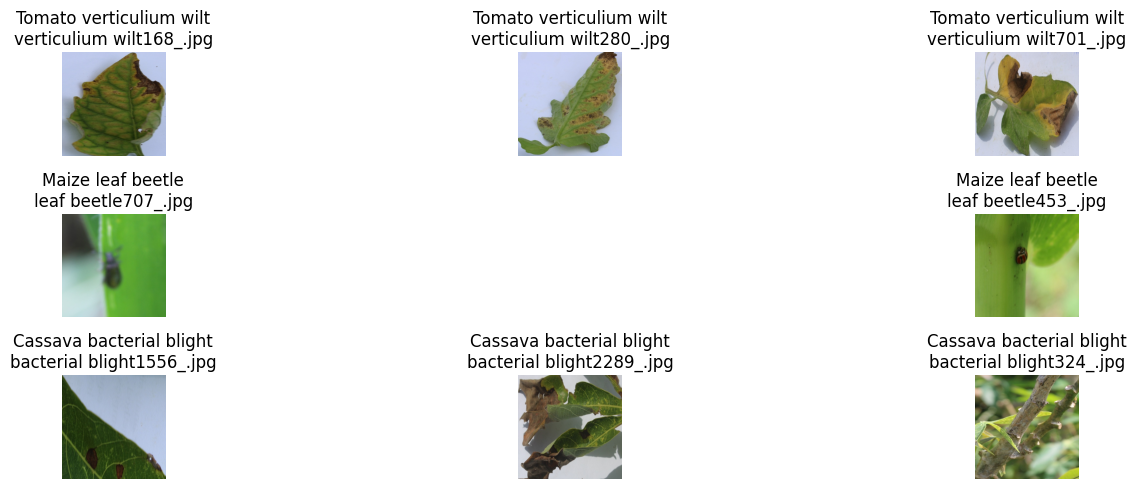

In [7]:
import random
import matplotlib.image as mpimg
num_samples=3
selected_classes=random.sample(classes,num_samples)
# تنظیمات نمایش
plt.figure(figsize=(15, 5))

# نمایش تصاویر
for i, cls in enumerate(selected_classes):
    cls_path = os.path.join(extract_path, cls)
    images = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]
    if len(images) == 0:
        print(f"هیچ تصویری در {cls} یافت نشد!")
        continue

    # انتخاب تصادفی 3 تصویر
    sample_images = random.sample(images, min(num_samples, len(images)))

    for j, image_name in enumerate(sample_images):
        img_path = os.path.join(cls_path, image_name)
        try:
            img = mpimg.imread(img_path)
            plt.subplot(3, num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.title(f"{cls}\n{image_name}")
            plt.axis('off')
        except OSError as e:
            print(f"Error reading image {image_name} in class {cls}: {e}")
            # Optionally, you can skip displaying this subplot or display a placeholder
            continue


plt.tight_layout()
plt.show()

In [8]:
import shutil
import os

# تعریف مسیرها
extract_path = '/content/crop_pest_and_desiase_classification'
output_path = '/content/organized_dataset'

# تعریف گروه‌بندی کلاس‌ها
healthy_classes = ['Cassava healthy', 'Maize healthy', 'Tomato healthy', 'Cashew healthy']
disease_affected_classes = [
    'Cassava bacterial blight', 'Cassava mosaic', 'Maize streak virus', 'Maize leaf blight',
    'Maize leaf spot', 'Tomato leaf blight', 'Tomato septoria leaf spot', 'Tomato leaf curl',
    'Tomato verticulium wilt', 'Cashew anthracnose', 'Cashew red rust', 'Cashew gumosis'
]
pest_infested_classes = [
    'Cassava green mite', 'Maize fall armyworm', 'Maize grasshoper', 'Maize leaf beetle',
    'Cashew leaf miner', 'Cassava brown spot'
]

# ایجاد پوشه‌های مقصد در output_path
os.makedirs(os.path.join(output_path, 'healthy'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'disease-affected'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'pest-infested'), exist_ok=True)

# کپی فایل‌های تصاویر به پوشه‌های جدید در output_path
for cls in classes:
    cls_path = os.path.join(extract_path, cls)
    if os.path.isdir(cls_path):  # اطمینان از اینکه cls یک پوشه است
        for img in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img)
            if os.path.isfile(img_path):  # فقط فایل‌ها کپی شوند
                if cls in healthy_classes:
                    shutil.copy(img_path, os.path.join(output_path, 'healthy', img))
                elif cls in disease_affected_classes:
                    shutil.copy(img_path, os.path.join(output_path, 'disease-affected', img))
                elif cls in pest_infested_classes:
                    shutil.copy(img_path, os.path.join(output_path, 'pest-infested', img))

# بررسی تعداد تصاویر در هر دسته
print("تعداد تصاویر در هر دسته:")
print(f"healthy: {len(os.listdir(os.path.join(output_path, 'healthy')))} تصویر")
print(f"disease-affected: {len(os.listdir(os.path.join(output_path, 'disease-affected')))} تصویر")
print(f"pest-infested: {len(os.listdir(os.path.join(output_path, 'pest-infested')))} تصویر")

تعداد تصاویر در هر دسته:
healthy: 1369 تصویر
disease-affected: 15195 تصویر
pest-infested: 5780 تصویر


In [9]:
import os
import shutil
from PIL import Image

# مسیرها
extract_path = '/content/crop_pest_and_desiase_classification'
output_path = '/content/organized_dataset'

# بررسی محتوای extract_path
print("بررسی محتوای extract_path:")
classes = [d for d in os.listdir(extract_path) if os.path.isdir(os.path.join(extract_path, d))]
print(f"پوشه‌های موجود در extract_path: {classes}")
print(f"تعداد کلاس‌ها: {len(classes)}")

# بررسی تعداد فایل‌ها در هر کلاس
for cls in classes:
    cls_path = os.path.join(extract_path, cls)
    num_files = len([f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))])
    print(f"{cls}: {num_files} فایل")

# تعریف گروه‌بندی کلاس‌ها
healthy_classes = ['Cassava healthy', 'Maize healthy', 'Tomato healthy', 'Cashew healthy']
disease_affected_classes = [
    'Cassava bacterial blight', 'Cassava mosaic', 'Maize streak virus', 'Maize leaf blight',
    'Maize leaf spot', 'Tomato leaf blight', 'Tomato septoria leaf spot', 'Tomato leaf curl',
    'Tomato verticulium wilt', 'Cashew anthracnose', 'Cashew red rust', 'Cashew gumosis'
]
pest_infested_classes = [
    'Cassava green mite', 'Maize fall armyworm', 'Maize grasshoper', 'Maize leaf beetle',
    'Cashew leaf miner', 'Cassava brown spot'
]

# بررسی وجود کلاس‌های مورد انتظار
missing_classes = [cls for cls in (healthy_classes + disease_affected_classes + pest_infested_classes) if cls not in classes]
if missing_classes:
    print(f"هشدار: کلاس‌های زیر در extract_path یافت نشدند: {missing_classes}")
    raise ValueError("کلاس‌های مورد انتظار در extract_path وجود ندارند!")

# پاک کردن output_path و ایجاد پوشه‌های جدید
if os.path.exists(output_path):
    shutil.rmtree(output_path)
os.makedirs(os.path.join(output_path, 'healthy'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'disease-affected'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'pest-infested'), exist_ok=True)

# کپی فایل‌های تصاویر
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff', '.webp')
for cls in classes:
    cls_path = os.path.join(extract_path, cls)
    if os.path.isdir(cls_path):
        for img in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img)
            if os.path.isfile(img_path) and img.lower().endswith(valid_extensions):
                try:
                    with Image.open(img_path) as img_pil:
                        img_pil.verify()  # بررسی صحت فایل
                    if cls in healthy_classes:
                        shutil.copy(img_path, os.path.join(output_path, 'healthy', img))
                    elif cls in disease_affected_classes:
                        shutil.copy(img_path, os.path.join(output_path, 'disease-affected', img))
                    elif cls in pest_infested_classes:
                        shutil.copy(img_path, os.path.join(output_path, 'pest-infested', img))
                except Exception as e:
                    print(f"فایل مشکل‌دار یافت شد و کپی نشد: {img_path} ({str(e)})")

# بررسی تعداد تصاویر در output_path
print("\nتعداد تصاویر در هر دسته:")
for cls in ['healthy', 'disease-affected', 'pest-infested']:
    cls_path = os.path.join(output_path, cls)
    if os.path.exists(cls_path):
        num_images = len([f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))])
        print(f"{cls}: {num_images} تصویر")
        if num_images == 0:
            print(f"هشدار: پوشه {cls} خالی است!")
            raise ValueError(f"پوشه {cls} خالی است!")

# حذف پوشه .ipynb_checkpoints
checkpoints_path = os.path.join(output_path, '.ipynb_checkpoints')
if os.path.exists(checkpoints_path):
    shutil.rmtree(checkpoints_path)
    print(f"پوشه .ipynb_checkpoints حذف شد.")

بررسی محتوای extract_path:
پوشه‌های موجود در extract_path: ['Cassava healthy', 'Maize leaf blight', 'Cashew healthy', 'Tomato leaf blight', 'Cashew red rust', 'Maize leaf beetle', 'Maize grasshoper', 'Tomato septoria leaf spot', 'Maize fall armyworm', 'Cashew anthracnose', 'Maize streak virus', 'Cassava mosaic', 'Tomato healthy', 'Cassava green mite', 'Cassava bacterial blight', 'Cashew leaf miner', 'Maize leaf spot', 'Tomato leaf curl', 'Maize healthy', 'Cashew gumosis', 'Tomato verticulium wilt', 'Cassava brown spot']
تعداد کلاس‌ها: 22
Cassava healthy: 1193 فایل
Maize leaf blight: 1006 فایل
Cashew healthy: 1368 فایل
Tomato leaf blight: 1301 فایل
Cashew red rust: 1682 فایل
Maize leaf beetle: 948 فایل
Maize grasshoper: 673 فایل
Tomato septoria leaf spot: 2743 فایل
Maize fall armyworm: 285 فایل
Cashew anthracnose: 1729 فایل
Maize streak virus: 979 فایل
Cassava mosaic: 1205 فایل
Tomato healthy: 470 فایل
Cassava green mite: 1015 فایل
Cassava bacterial blight: 2614 فایل
Cashew leaf miner: 

In [10]:
from PIL import Image
import os
import shutil
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
import numpy as np

# مسیر دیتاست
output_path = '/content/organized_dataset'
extract_path = '/content/crop_pest_and_desiase_classification'

# تابع بررسی و حذف فایل‌های خراب در output_path
def check_images(directory):
    corrupted_files = []
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff', '.webp')
    for cls in ['healthy', 'disease-affected', 'pest-infested']:
        cls_path = os.path.join(directory, cls)
        if not os.path.exists(cls_path):
            continue
        for img in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img)
            if os.path.isfile(img_path) and img.lower().endswith(valid_extensions):
                try:
                    with Image.open(img_path) as img_pil:
                        img_pil.verify()
                    with Image.open(img_path) as img_pil:
                        img_pil.load()
                except Exception as e:
                    print(f"فایل خراب یافت شد و حذف شد: {img_path} ({str(e)})")
                    os.remove(img_path)
                    corrupted_files.append(img_path)
    return corrupted_files

# حذف پوشه .ipynb_checkpoints
checkpoints_path = os.path.join(output_path, '.ipynb_checkpoints')
if os.path.exists(checkpoints_path):
    shutil.rmtree(checkpoints_path)
    print(f"پوشه .ipynb_checkpoints حذف شد.")

# بررسی و حذف فایل‌های خراب
print("بررسی و حذف فایل‌های خراب در output_path...")
corrupted_files = check_images(output_path)
print(f"تعداد فایل‌های حذف‌شده: {len(corrupted_files)}")

# بررسی تعداد تصاویر در output_path
print("\nتعداد تصاویر در هر دسته:")
for cls in ['healthy', 'disease-affected', 'pest-infested']:
    cls_path = os.path.join(output_path, cls)
    if os.path.exists(cls_path):
        num_images = len([f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))])
        print(f"{cls}: {num_images} تصویر")
        if num_images == 0:
            print(f"هشدار: پوشه {cls} خالی است!")
            raise ValueError(f"پوشه {cls} خالی است!")

# تعریف تبدیل‌ها
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2), scale=(0.8, 1.2), shear=0.2),
    transforms.ToTensor(),
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# بارگذاری دیتاست‌ها
try:
    train_dataset = ImageFolder(output_path, transform=train_transforms)
    val_test_dataset = ImageFolder(output_path, transform=val_test_transforms)
    print("کلاس‌های یافت‌شده:", train_dataset.class_to_idx)
    print("تعداد کل تصاویر:", len(train_dataset))
except Exception as e:
    print(f"خطا در بارگذاری دیتاست: {str(e)}")
    raise

# تقسیم‌بندی داده‌ها
dataset_size = len(train_dataset)
indices = list(range(dataset_size))
np.random.shuffle(indices)

train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size

train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)
test_sampler = SubsetRandomSampler(test_indices)

BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=train_sampler)
val_loader = DataLoader(val_test_dataset, batch_size=BATCH_SIZE, sampler=val_sampler)
test_loader = DataLoader(val_test_dataset, batch_size=BATCH_SIZE, sampler=test_sampler)

print(f"تعداد داده‌های آموزشی: {len(train_indices)}")
print(f"تعداد داده‌های اعتبارسنجی: {len(val_indices)}")
print(f"تعداد داده‌های تست: {len(test_indices)}")

بررسی و حذف فایل‌های خراب در output_path...
فایل خراب یافت شد و حذف شد: /content/organized_dataset/healthy/healthy442_.jpg (broken data stream when reading image file)
فایل خراب یافت شد و حذف شد: /content/organized_dataset/healthy/healthy189_.jpg (broken data stream when reading image file)
فایل خراب یافت شد و حذف شد: /content/organized_dataset/healthy/healthy87_.jpg (broken data stream when reading image file)
فایل خراب یافت شد و حذف شد: /content/organized_dataset/disease-affected/streak virus421_.jpg (broken data stream when reading image file)
فایل خراب یافت شد و حذف شد: /content/organized_dataset/disease-affected/leaf spot957_.jpg (broken data stream when reading image file)
فایل خراب یافت شد و حذف شد: /content/organized_dataset/disease-affected/leaf spot424_.jpg (broken data stream when reading image file)
فایل خراب یافت شد و حذف شد: /content/organized_dataset/disease-affected/leaf blight813_.jpg (broken data stream when reading image file)
فایل خراب یافت شد و حذف شد: /content/org

In [11]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.datasets import ImageFolder

# مسیر دیتاست
output_path = '/content/organized_dataset'

# بررسی تعداد کلاس‌ها در دیتاست
dataset = ImageFolder(output_path)
num_classes = len(dataset.classes)
print(f"تعداد کلاس‌های دیتاست: {num_classes}")
print(f"کلاس‌های دیتاست: {dataset.class_to_idx}")
if num_classes != 3:
    raise ValueError("دیتاست باید دقیقاً 3 کلاس داشته باشد: healthy, disease-affected, pest-infested")

# تعریف دستگاه
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"دستگاه: {device}")

# بارگذاری مدل ResNet18
model = models.resnet18(weights='IMAGENET1K_V1')

# فریز کردن لایه‌ها
for param in model.parameters():
    param.requires_grad = False

# تنظیم لایه آخر برای 3 کلاس
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 3)

# انتقال مدل به دستگاه
model = model.to(device)

# تعریف تابع خطا و بهینه‌ساز (فقط برای لایه آخر)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)  # فقط پارامترهای لایه fc

# نمایش خلاصه مدل
print(model)

تعداد کلاس‌های دیتاست: 3
کلاس‌های دیتاست: {'disease-affected': 0, 'healthy': 1, 'pest-infested': 2}
دستگاه: cuda
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 214MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Epoch [1/20]
Train Loss: 0.5114, Train Accuracy: 78.32%
Val Loss: 0.4083, Val Accuracy: 82.97%
Epoch [2/20]
Train Loss: 0.4205, Train Accuracy: 81.93%
Val Loss: 0.3754, Val Accuracy: 84.56%
Epoch [3/20]
Train Loss: 0.4130, Train Accuracy: 82.63%
Val Loss: 0.3829, Val Accuracy: 83.72%
Epoch [4/20]
Train Loss: 0.3989, Train Accuracy: 83.35%
Val Loss: 0.3881, Val Accuracy: 83.84%
Epoch [5/20]
Train Loss: 0.3913, Train Accuracy: 83.68%
Val Loss: 0.3725, Val Accuracy: 84.26%
Epoch [6/20]
Train Loss: 0.3925, Train Accuracy: 83.53%
Val Loss: 0.3538, Val Accuracy: 85.36%
Epoch [7/20]
Train Loss: 0.3901, Train Accuracy: 83.70%
Val Loss: 0.3512, Val Accuracy: 84.91%
Epoch [8/20]
Train Loss: 0.3860, Train Accuracy: 83.70%
Val Loss: 0.3687, Val Accuracy: 84.56%
Epoch [9/20]
Train Loss: 0.3863, Train Accuracy: 83.24%
Val Loss: 0.3699, Val Accuracy: 85.12%
Epoch [10/20]
Train Loss: 0.3921, Train Accuracy: 83.27%
Val Loss: 0.3859, Val Accuracy: 84.32%
Epoch [11/20]
Train Loss: 0.3853, Train Accuracy:

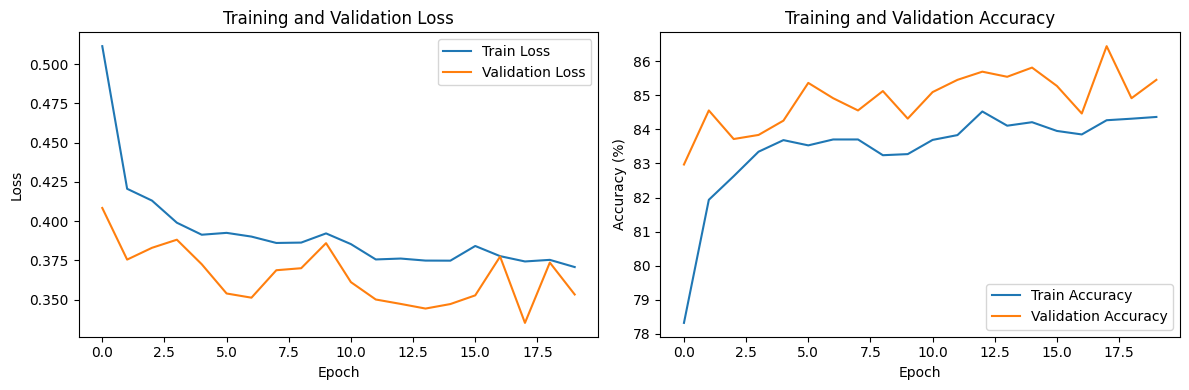

In [12]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# فرض می‌کنیم train_loader و val_loader از قبل تعریف شده‌اند
# تعریف تعداد epochها
EPOCHS = 20

# لیست برای ذخیره دقت و خطا
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# آموزش و اعتبارسنجی
for epoch in range(EPOCHS):
    model.train()  # حالت آموزش
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # صفر کردن گرادیان‌ها
        optimizer.zero_grad()

        # پیش‌رو
        outputs = model(images)
        loss = criterion(outputs, labels)

        # پس‌رو و به‌روزرسانی
        loss.backward()
        optimizer.step()

        # محاسبه خطا و دقت
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # اعتبارسنجی
    model.eval()  # حالت ارزیابی
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # چاپ نتایج هر epoch
    print(f'Epoch [{epoch+1}/{EPOCHS}]')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')
    print(f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

# رسم نمودارهای دقت و خطا
plt.figure(figsize=(12, 4))

# نمودار خطا
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# نمودار دقت
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()